<a href="https://colab.research.google.com/github/tgundapaneni/Single-Layer-Perceptron-from-scratch/blob/main/SL_Perceptron_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # used to split data to training set and Test set

In [ ]:
#This code is tested on the below 2 datasets,
#Specify the path for the dataset to be tested below inbetween the Quotes

#df1 = pd.read_csv("IntelligentAnalytics/Two_Class_Gaussian_Data.csv",header=None)
df1 = pd.read_csv("IntelligentAnalytics/two_class_uniform_data.csv",header=None)
df1.head(5)

,0,1,2
0,0.9936,0.9790,A
1,0.9126,0.7843,A
2,1.4803,0.5669,A
3,1.0470,1.2944,A
4,1.1781,0.5435,A


In [ ]:
data=df1.to_numpy()

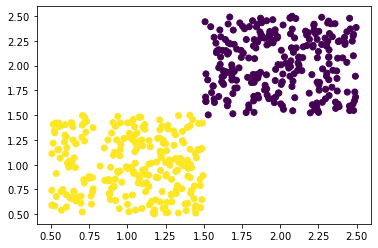

In [ ]:
#Plot Input Data

import matplotlib.pyplot as plt
df=data
df[df=='A'] = 1
df[df=='B'] = -1
a=df[:,0]
b=df[:,1]
c=df[:,2]

plt.scatter(a,b,c=c)

In [ ]:
 #Signum function is used, for values>=0, it will return +1 else -1
    
def activation_func(value):   
    return np.sign(value)

In [ ]:
# This function is called to train the data,train_data_inputs,train_data_outputs and learning rate are passed as inputs,
#using each set of inputs at time weights are updated and the final weights are returned. it displays weights after every Iteration

def perceptron_train(input_data,labels,learn_rate):
    X=input_data
    bias = np.ones((X.shape[0],1))
    X=np.concatenate((bias,X), axis = 1) # including bias =1 in the input vector in the beginning, so first input 
    y=np.array(labels)
    weights=np.zeros(X.shape[1]) #w0 will be the weight of the bias
    original=weights
    print('Initial weights : '+str(weights))
    for key in range(X.shape[0]):
        a=activation_func(np.matmul(np.transpose(weights),X[key]))     
        #a=np.matmul(np.transpose(weights),X[key])     
        yn=a
        weights=weights+learn_rate*(y[key]-yn)*X[key]
        print('Iteration '+str(key)+': '+str(weights))
    print('Difference: '+str(weights-original))
    return weights

In [ ]:
# This function is called to test the dataset, test_input_data, Array size of y and weights are passed as inputs, for every row of inputs y
# is calculated and the complete output y Array is returned

def perceptron_test(input_data,label_shape,weights):
    X=np.array(input_data)
    bias = np.ones((X.shape[0],1))
    X=np.concatenate((bias,X), axis = 1) # including bias =1 in the input vector in the beginning, so first input 
    w=weights
    y=np.zeros(label_shape)
    for key in range(X.shape[0]):
        #print('test_weights '+str(key)+': '+str(w))
        #print('test_x '+str(key)+': '+str(X[key]))
        a=activation_func(np.matmul(np.transpose(weights),X[key]))
        #print('Test_a'+str(key)+': '+str((np.matmul(np.transpose(weights),X[key]))))
        y[key]=a
    #print(y)
    return y

In [ ]:
# This function is called to split data, dataset and the percentage of training set are passed as input paramters. 
# 2 output arrays, training set and testing set are returned

def data_split(A,split_ratio):
    np.random.shuffle(A)
    trn = int(round(split_ratio*(A.shape[0]),0))
    tst = int(round(A.shape[0] - trn,0))
    #print(trn)
    #print(tst)
    train_dataset, test_dataset = train_test_split(A, test_size=tst)
    #print(test_dataset)
    #print(train_dataset)
    return (train_dataset, test_dataset) 

In [ ]:
# This function is called to spit out the accuray of the test dataset, result array from Tesr function and test_output are passed as 
# input parameters and based on the difference the score is calculated.

def accuracy(result,labels) :
    diff = result-labels
    ctr = 0
    #print(result)
    #print(labels)
    for i in range(diff.shape[0]):
        if diff[i] == 0:
            ctr += 1
    score=(ctr*100)/diff.size
    #print('Counter='+str(ctr))
    print('Score='+str(score))

In [ ]:
#MAIN CODE BLOCK

#Enter the desired percentage of training set to be generated
Train_split_ratio = 0.8                                        
# Enter the number of input parameters in the dataset
Inp_Param = 2  
# Enter learning Rate
learning_rate = 0.006
#Call Function Data_Split to split data into training and test data sets
data_train,data_test = data_split(data,Train_split_ratio)      
#split the Test and Training sets into inputs X and ouptuts/Labels Y
X_train =data_train[:,0:Inp_Param]                             
y_train=data_train[:,Inp_Param]
X_test = data_test[:,0:Inp_Param]
y_test = data_test[:,Inp_Param]
# Map training and test Labels to 1 if they belong to Class A and -1 if they belong to Class B
y_train[y_train=='A'] = 1
y_train[y_train=='B'] = -1
y_test[y_test=='A'] = 1
y_test[y_test=='B'] = -1

#Call Function perceptron_train to train the model and generate weights, it displays weights after every Iteration.
weights = perceptron_train(X_train,y_train,learning_rate)

#Call Function perceptron_test to the model and generate output Y
#print('weights to Test function '+str(key)+': '+str(weights))
result_test = perceptron_test(X_test,y_test.shape,weights)

#Call Function accuracy to to calculate and display score
accuracy(result_test,y_test)


Initial weights : [0. 0. 0.]
Iteration 0: [-0.006 -0.013779600000000001 -0.0105684]
Iteration 1: [-0.006 -0.013779600000000001 -0.0105684]
Iteration 2: [0.006 0.0018912000000000009 0.0037871999999999992]
Iteration 3: [0.006 0.0018912000000000009 0.0037871999999999992]
Iteration 4: [0.006 0.0018912000000000009 0.0037871999999999992]
Iteration 5: [-0.006 -0.018691199999999998 -0.022216800000000002]
Iteration 6: [0.006 -0.0019799999999999957 -0.005716800000000001]
Iteration 7: [0.018000000000000002 0.008790000000000004 0.003422399999999999]
Iteration 8: [0.006000000000000002 -0.012135599999999995 -0.0224232]
Iteration 9: [0.018000000000000002 -0.0007079999999999934 -0.0111864]
Iteration 10: [0.018000000000000002 -0.0007079999999999934 -0.0111864]
Iteration 11: [0.018000000000000002 -0.0007079999999999934 -0.0111864]
Iteration 12: [0.018000000000000002 -0.0007079999999999934 -0.0111864]
Iteration 13: [0.018000000000000002 -0.0007079999999999934 -0.0111864]
Iteration 14: [0.0180000000000000